In [21]:
# Confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score


# Vorbereitung
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import IsolationForest

import Builder
import pandas as pd
import seaborn as sns
import numpy as np
import itertools
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
def plot_confusion_matrix(cm):
    cm_perc = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    cf_matrix = cm
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    #group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)

    ax = plt.subplot()
    sns.heatmap(cf_matrix, annot=labels,fmt='', cmap='magma' )
    ax.set_xlabel('Predicted lables')
    ax.set_ylabel('True lables')
    ax.set_title('Confusion Matrix ')
    ax.xaxis.set_ticklabels(['normal', 'anomaly']); ax.yaxis.set_ticklabels(['normal','anomaly'])
    plt.show()

    ax = plt.subplot()
    sns.heatmap(cm_perc, annot=True,fmt='.2%', cmap='Blues' )
    ax.set_xlabel('Predicted lables')
    ax.set_ylabel('True lables')
    ax.set_title('Confusion Matrix normalize')
    ax.xaxis.set_ticklabels(['normal', 'anomaly']); ax.yaxis.set_ticklabels(['normal','anomaly'])
    plt.show()


def class_report(data, label):
    print(classification_report(data['Jumps'], data[label], target_names=['normal','outlier']))

In [23]:
data = Builder.simulation_test(S=1.0, T=1, r=0.02, m=0, v=0.055, l=10, step=1000, Npaths=1, sigma=0.35,N=1,print_f1=True)

Anomaly merton: 0 of 9 anomalies (0.0 %) in total: 10
-----------------------------
Anomaly Returns IF: 9 of 9 anomalies (100.0 %) in total: 10
-----------------------------
Anomaly RSV IF: 9 of 9 anomalies (100.0 %) in total: 10
-----------------------------
Anomaly Diff IF: 7 of 9 anomalies (78.0 %) in total: 9
-----------------------------
Amomaly RSV Diff: 8 of 9 anomalies (89.0 %) in total: 10
-----------------------------
Amomaly Returns RSV Diff: 8 of 9 anomalies (89.0 %) in total: 10
-----------------------------
Cutoff Jump: 7 of 9 anomalies (78.0 %) in total: 8
-----------------------------
CutOff Return: 7 of 9 anomalies (78.0 %) in total: 8
-----------------------------
CutOff RSV: 7 of 9 anomalies (78.0 %) in total: 8
-----------------------------
CutOff Diff: 7 of 9 anomalies (78.0 %) in total: 8
-----------------------------
IF Return:  0.947
Cutoff Return:  1.0
---------------------
IF Diff:  0.778
Cutoff Diff:  0.824
---------------------
IF RSV:  0.947
Cutoff RSV:  1.

In [24]:
class_report(data,'Anomaly merton')

              precision    recall  f1-score   support

      normal       0.99      0.99      0.99       991
     outlier       0.00      0.00      0.00         9

    accuracy                           0.98      1000
   macro avg       0.50      0.49      0.50      1000
weighted avg       0.98      0.98      0.98      1000



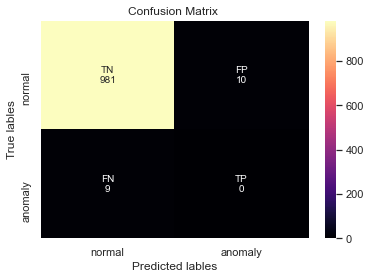

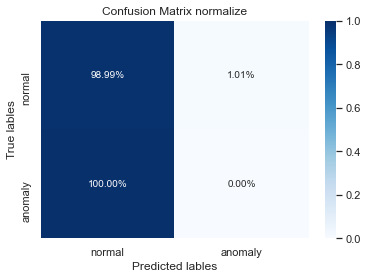

In [25]:
cm = confusion_matrix(data['Jumps'], data['Anomaly merton'])
plot_confusion_matrix(cm)

In [26]:
# precision = TP / TP+FP   # recall = TP / TP+FN
# interested in recall !!

In [27]:
print('CutOff Diff')
class_report(data,'CutOff Diff')
f1_score(data['Jumps'], data['CutOff Diff'])

CutOff Diff
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00       991
     outlier       0.88      0.78      0.82         9

    accuracy                           1.00      1000
   macro avg       0.94      0.89      0.91      1000
weighted avg       1.00      1.00      1.00      1000



0.823529411764706

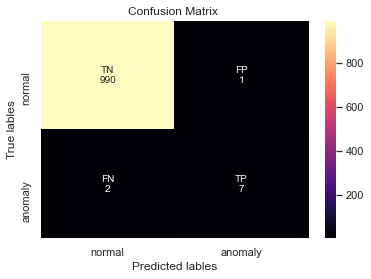

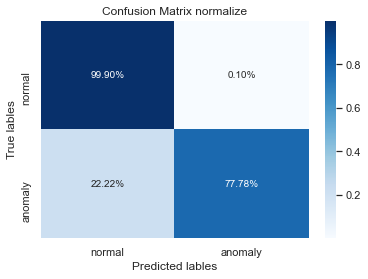

In [28]:
cm = confusion_matrix(data['Jumps'], data['CutOff Diff'])
plot_confusion_matrix(cm)

In [29]:
#Builder.plotter(data)


In [30]:
# Versuch mit Trainingsdaten

X_train, X_test, y_train, y_test = train_test_split(data[['Return log']], data[['Jumps']], test_size=0.33,random_state=11)
clfIF = IsolationForest(max_samples =0.25, random_state=11, contamination=10/1000, n_estimators=100)
clfIF.fit(X_train,y_train)
y_pred_train = clfIF.predict(X_train)

df = pd.DataFrame(y_pred_train,columns=['Test'])
df_list = [0 if i ==1 else 1 for i in df['Test'].to_list()]

df['Test'] = df_list
print(classification_report(y_train['Jumps'], df['Test'], target_names=['normal','outlier']))

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00       663
     outlier       0.86      0.86      0.86         7

    accuracy                           1.00       670
   macro avg       0.93      0.93      0.93       670
weighted avg       1.00      1.00      1.00       670

